https://github.com/SD347053795/DI_Hackathon_3


Hackathon Subject 3: Exploring Employee Attrition and Performance in a Corporate Environment
Description:

In this hackathon, participants are tasked with exploring the factors that contribute to employee attrition and performance within a corporate environment. Using the “IBM HR Analytics Employee Attrition & Performance” dataset, the objective is to conduct an in-depth analysis to uncover patterns and correlations that could help the organization better understand the causes of employee turnover. The insights gained will aid in developing strategies to improve employee satisfaction, retention, and overall performance.

This dataset allows participants to answer important questions such as how factors like distance from home, job role, and work-life balance affect attrition rates, and how variables such as education level and job satisfaction correlate with performance ratings.

Data source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Key Tasks:

Exploratory Data Analysis (EDA):
Perform a comprehensive analysis to understand the distribution of the data and identify key trends.
Visualize the distribution of attrition across different demographic and job-related variables, such as age, gender, education, job role, and department.
Explore how employee satisfaction (e.g., JobSatisfaction, EnvironmentSatisfaction) and work-life balance influence attrition rates.

Data Preprocessing:

Handle missing data and clean the dataset to prepare it for analysis.
Encode categorical variables like JobRole, MaritalStatus, and OverTime to facilitate data exploration.
Normalize or standardize numerical features like MonthlyIncome, Age, and DistanceFromHome to ensure accurate comparisons.

Correlation and Trend Analysis:

Analyze correlations between employee attributes (e.g., Education, JobSatisfaction, WorkLifeBalance) and attrition rates.
Investigate trends in performance ratings across different job roles and departments.
Create cross-tabulations and heatmaps to visualize relationships between key variables, such as DistanceFromHome by JobRole and Attrition, or MonthlyIncome by Education and Attrition.

Visualization:

Use Matplotlib and Seaborn to create insightful visualizations that effectively communicate the findings. Examples include bar plots, box plots, and heatmaps. Or you can directly create them with Tableau or PowerBI.
Create an interactive dashboard using Tableau or PowerBI to allow for dynamic exploration of the data and insights.

Bonus: Retention Strategy Development:

Based on the analysis, propose actionable strategies to reduce employee attrition. Consider factors such as improving job satisfaction, enhancing work-life balance, and providing targeted support to high-risk groups.

Deliverables:

Participants are expected to submit a comprehensive report detailing their exploratory data analysis, data preprocessing steps, and key findings. Additionally, a presentation should be prepared to showcase visualizations and offer recommendations based on the insights. An interactive dashboard is optional but can enhance the presentation of results.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

df = pd.read_csv('HR_Employee_Attrition_Dataset.csv')
print(df.head())
print(df.info())
df.isnull().sum()
print(df.shape)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Select categorical columns
categorical_cols = ['Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' avoids dummy variable trap

# Fit and transform categorical data
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Select numerical columns
numerical_cols = ['MonthlyIncome', 'Age', 'DistanceFromHome']

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform numerical data
scaled_data = scaler.fit_transform(df[numerical_cols])

# Replace original numerical columns with scaled data
df[numerical_cols] = scaled_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


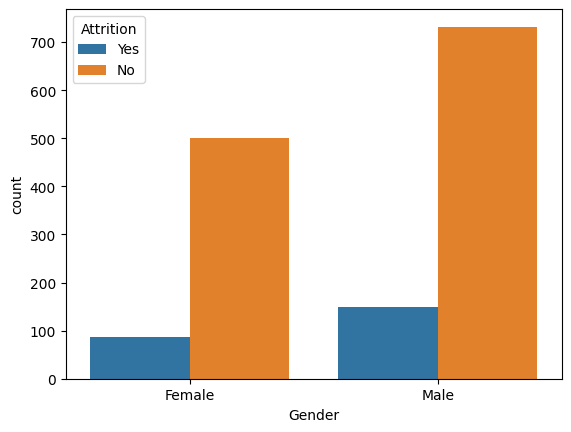

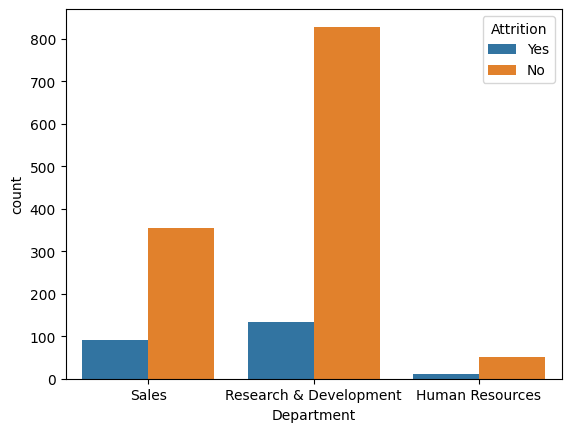

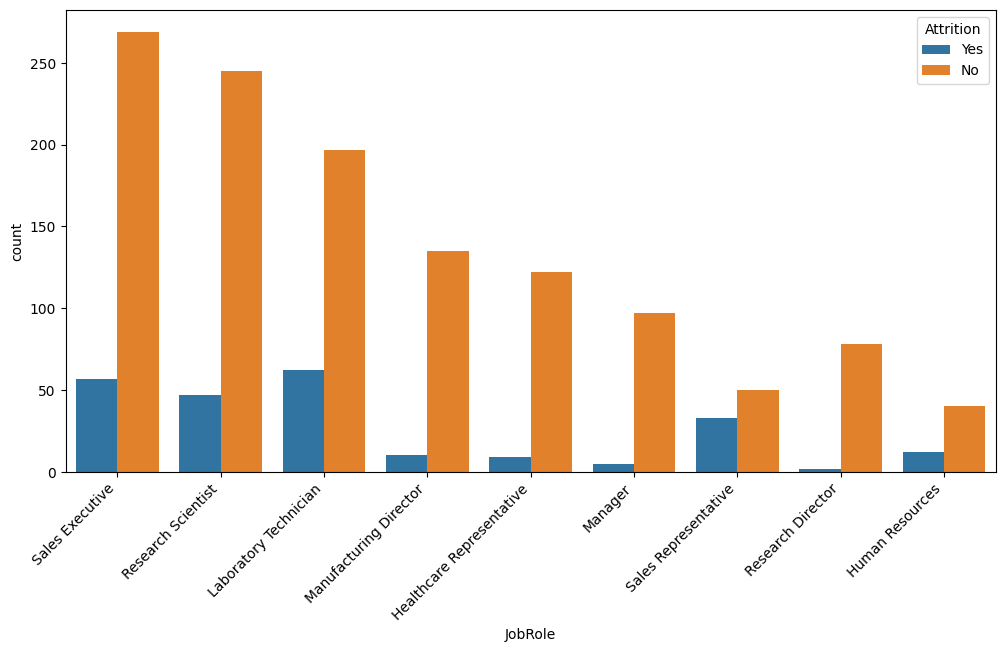

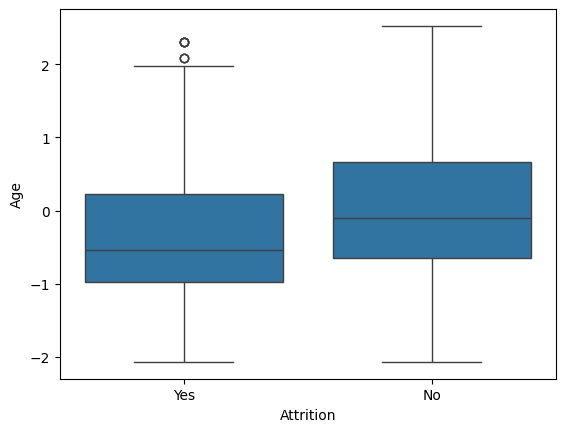

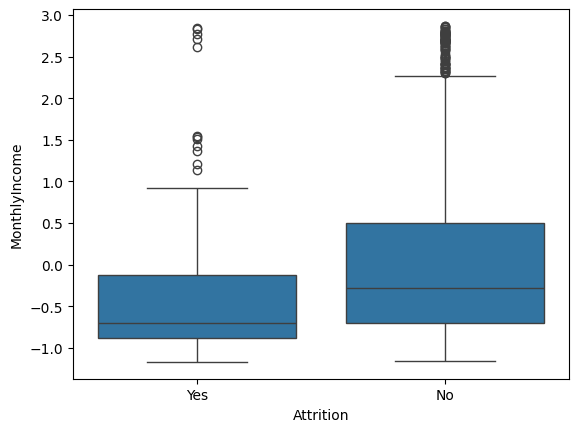

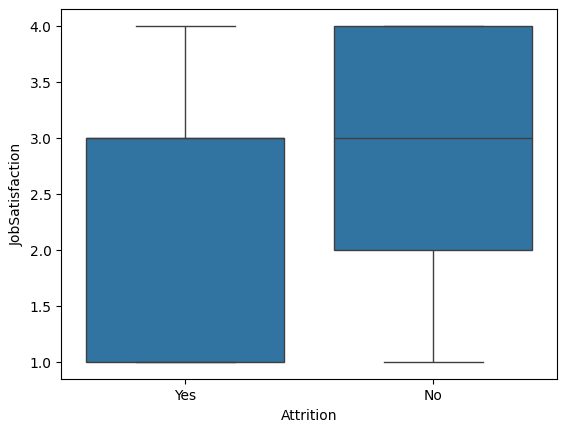

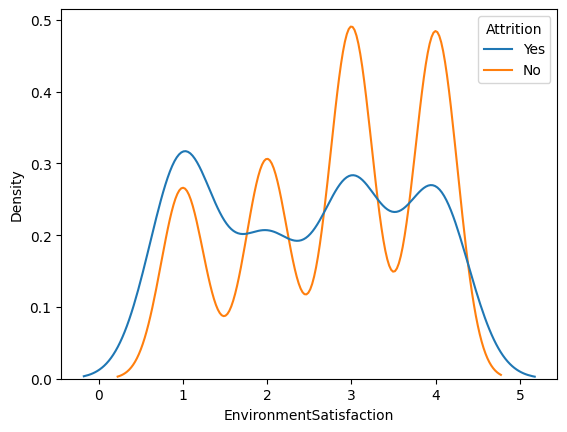

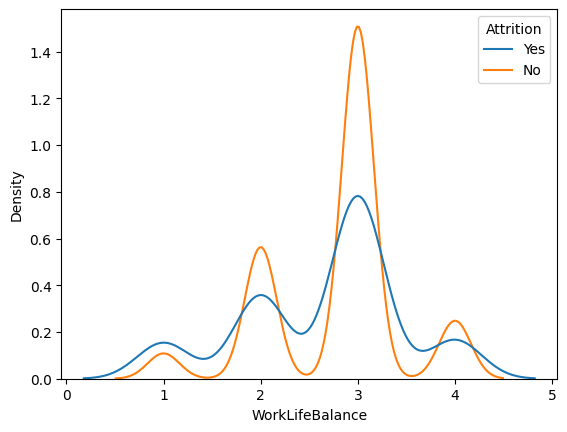

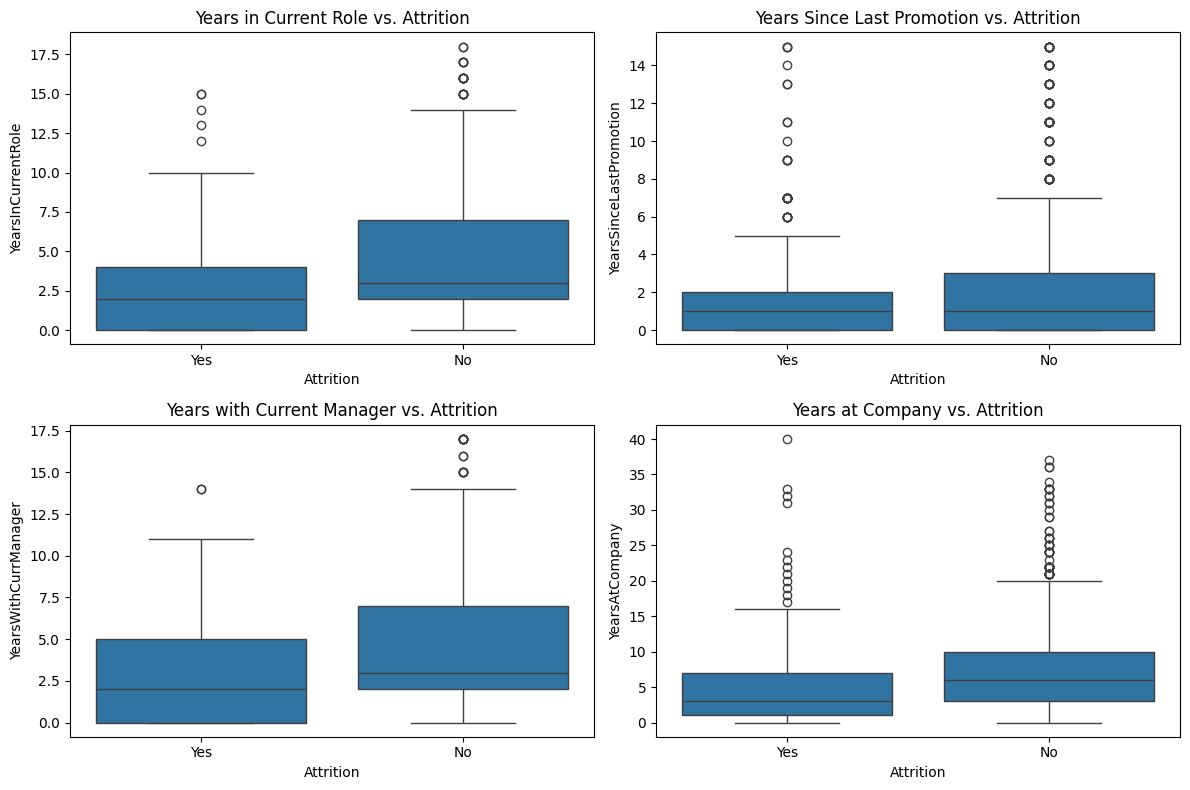

In [ ]:
# Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.show()

# Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.show()

# Attrition by Job Role
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

import plotly.express as px

# Group data by JobRole and Attrition and count occurrences
attrition_by_role = df.groupby(['JobRole', 'Attrition'])['Attrition'].count().unstack().fillna(0)

# Calculate percentages
attrition_percentage = attrition_by_role.div(attrition_by_role.sum(axis=1), axis=0) * 100

# Create stacked bar chart
fig = px.bar(attrition_percentage,
             x=attrition_percentage.index,
             y=['Yes', 'No'],
             title='Attrition by Job Role (Percentage)',
             labels={'value': 'Percentage', 'variable': 'Attrition'})

# Update layout for better readability
fig.update_layout(barmode='stack', xaxis_tickangle=45)

# Display the chart
fig.show()

# Attrition by Age
sns.boxplot(x='Attrition', y='Age', data=df)
plt.show()

# Attrition by Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()

# Attrition by Job Satisfaction
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.show()

# Attrition by Environment Satisfaction
sns.kdeplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', common_norm=False)
plt.show()

# Attrition by Work Life Balance
sns.kdeplot(data=df, x='WorkLifeBalance', hue='Attrition', common_norm=False)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Years in Current Role vs. Attrition')

sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Years Since Last Promotion vs. Attrition')

sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Years with Current Manager vs. Attrition')

sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Years at Company vs. Attrition')

plt.tight_layout()
plt.show()

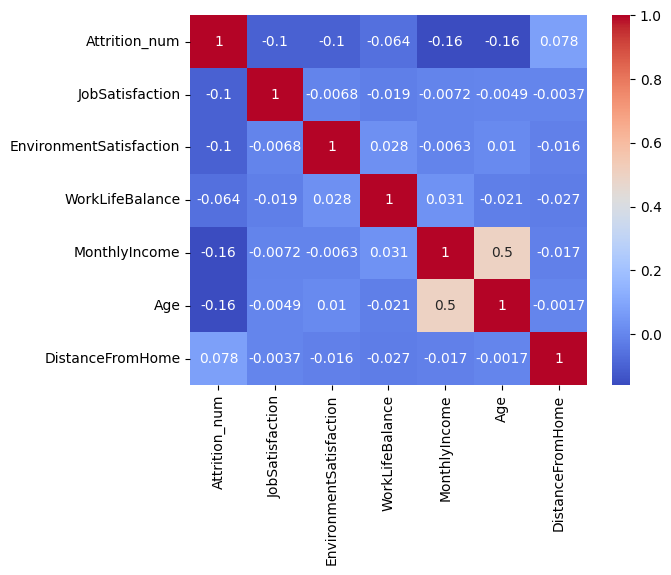

In [ ]:
# Convert 'Attrition' column to numerical (0 for 'No', 1 for 'Yes')
df['Attrition_num'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate correlations
corr = df[['Attrition_num', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'MonthlyIncome', 'Age', 'DistanceFromHome']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

DistanceCategory                       0    1    2   3   All
JobRole                   Attrition                         
Healthcare Representative No          75   24   18   5   122
                          Yes          1    3    4   1     9
Human Resources           No          31    5    3   1    40
                          Yes          5    2    5   0    12
Laboratory Technician     No         130   28   29  10   197
                          Yes         40   12    8   2    62
Manager                   No          70   12    6   9    97
                          Yes          3    1    0   1     5
Manufacturing Director    No          84   19   23   9   135
                          Yes          6    2    2   0    10
Research Director         No          51   17    6   4    78
                          Yes          1    1    0   0     2
Research Scientist        No         166   34   29  16   245
                          Yes         27   10    9   1    47
Sales Executive         

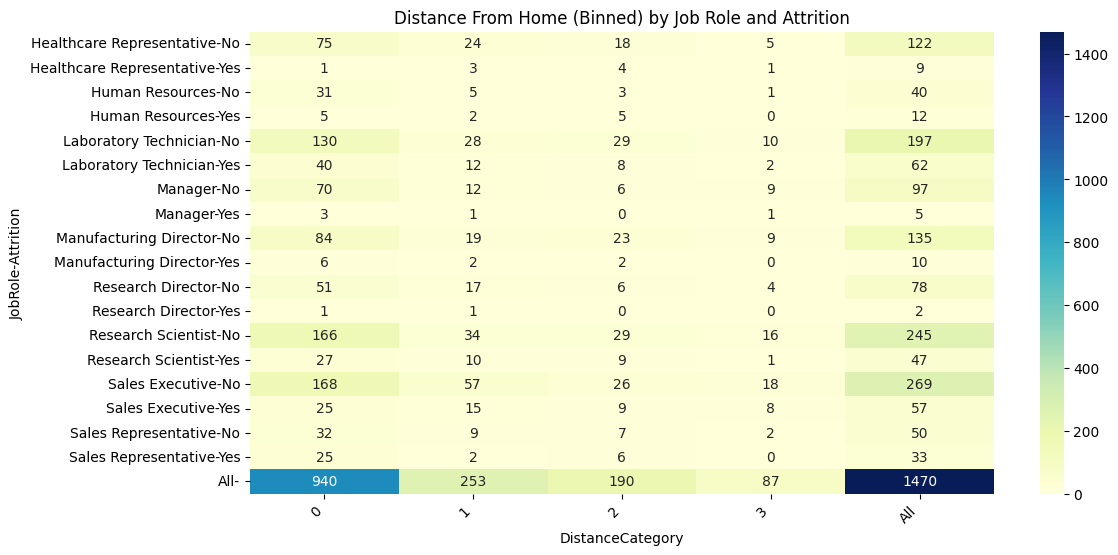

In [ ]:
# Binning 'DistanceFromHome'
df['DistanceCategory'] = pd.cut(df['DistanceFromHome'], bins=[-np.inf, 0, 1, 2, 3, 4, 5, np.inf], labels=['0', '1', '2', '3', '4', '5', '6+'])

# Create cross-tabulation with binned distances
crosstab_binned = pd.crosstab([df['JobRole'], df['Attrition']], df['DistanceCategory'], margins=True)

# Display cross-tabulation
print(crosstab_binned)

# Create heatmap with binned distances
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_binned, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Distance From Home (Binned) by Job Role and Attrition')
plt.xticks(rotation=45, ha='right')
plt.show()

**Findings/Results**

*Disclaimer: We wanted to show a lot of these charts/graphs on Tableau, but after speaking with the teacher, we couldn't create and display all of the visualizations we wanted to by virtue of only have the public version of Tableau software and some features were not available.*

We examined potential factors contributing to employee attrition by analyzing how the attrition rate correlates with various characteristics, including Age, Business Travel, Monetary Compensation, Distance from Home, Gender, Job Role, Job Satisfaction, Work-Life Balance, and Years at the Company. Our goal was to identify trends among those who left the company and, more importantly, to understand the characteristics of employees who chose to stay.

Our Results:

There are 1,470 employees in this Dataset, 237 of them left, leaving 1233 (84%) to remain working.  While it is a high ratio, we decided to look at common factors to try and determine how the company can improve its retention.

Age: The average age of the employees who left the company were between the ages of 25 and 35. This is interesting because the average age of all the employees are about 37 years old, suggesting that the younger minority of employees are leaving.

Busniess Travel:  Orignially we made a graph to look to see if there is a correlation between busniess travel and attrition. There are definatly more employees who leave the company that are traveling more frequently than not.  That being said I thought the married people who had to travel the would be the ones most likely to leave their job however single people are the ones who are most likely to leave their positions. This makes me want to look further into the compentionsation

Distance From Home:  This graph was interesting to me because we hypothesized that most people who left would live the furthest away, however that does not match the findings.  I would be interested to see this data on a map to then potentially determine if there is a specific region or direction employees who quit are living in, and possibly offer a solution to some sup-population.  

Income: It looks like the most common income is between $1,500-$2,500 a month. Additionally the amount of people who are leaving within each pay grade was not different with statistical significance (t-test= -0.55,
p = 0.60) Income is not the only characteristic of an employees total compensation package, and other metrics like Paid Time Off might be worth analyzing in future studies.

Years at Company:  We were able to identify a higher proportion of attrition within the first 2 years of hire, but it seems that once some amount of experience , over 4 years of loyalty is built, the attrition rate significantly decreases.  It might be worth while to look into an incentive program for the first three years of employement that is not promotion based.

Work Life Balance: As one would predict the attrition rate for people who said they have low work life balance tend to leave the company as a higher rate than anyone else. However, it is particularly interesting that those who rated "4" on the scale of "1-4" were slightly more likely to leave than those who ranked "2" or "3", and while all had a much lower attrition rate than those who marked "1", an interesting nuance that might be explored in those who marked "4" and still left, if they left because they possibly felt too comfortable or simply didn't respond honestly to the questionnaire.

Job Satisfaction: While Job Satisfaction is default the most direct predictive characteristic for attrition, the metric for this variable was not the most sensitive. Many more people rated themselves a "3" for how satisfated they are but still left at the same rate as the people who rating themselves as a "2", which is incongrous to the point that possibly the form of metric, the way the question was asked or was/was not validated by the surveyors, is problematic. There are many nuances to what makes a job satisfying, and further exploration into the workplace culture, other aspects of total compensation, and comparison with other similar companies may provide more specific feedback


Overall, an over 80% retention rate is really good for a company, especially at over 1,000 employees.  If the company would want to get closer to 95% retention rate, it would be possible to create a plan and do a cost benefit analysis to see if that would be worth the time and resources. **Especially becuase no particular variable of those we had time to investigate from this data set stood out as an obvious or specific cause of attrition.**  

Additionally, the data of a possible exit survey, or if fired, the internal report on the reason for letting go, might be more fitting to answer the research question on attrition.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = 'HR_Employee_Attrition_Dataset.csv'
data = pd.read_csv(file_path)

The average age of employees is: 36.92 years
The median age of employees is: 36.0 years
The mode of the ages of employees is: 35 years


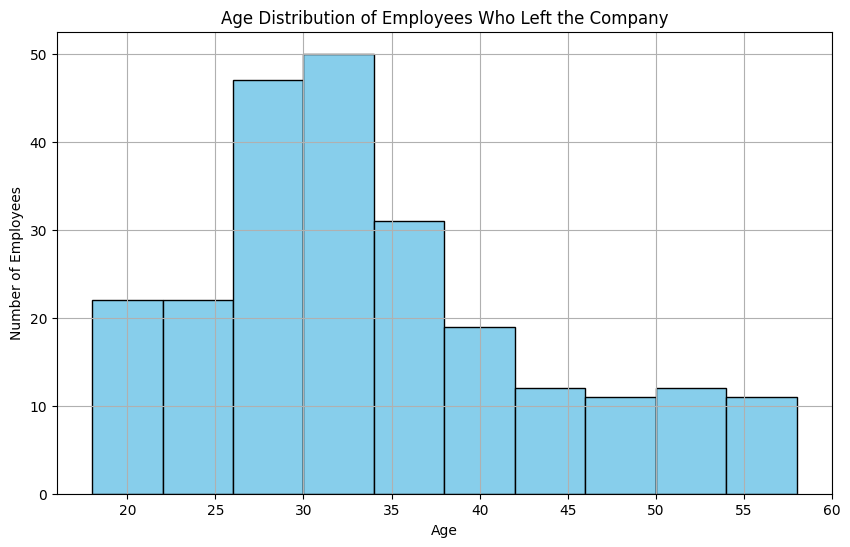

In [ ]:
#Average Age Employees Left

average_age = data['Age'].mean()
print(f"The average age of employees is: {average_age:.2f} years")
median_age = data['Age'].median()
print(f"The median age of employees is: {median_age} years")
mode_age = data['Age'].mode()[0]
print(f"The mode of the ages of employees is: {mode_age} years")

left_employees = data[data['Attrition'] == 'Yes']
left_ages = left_employees['Age']

plt.figure(figsize=(10, 6))
plt.hist(left_ages, bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Employees Who Left the Company')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

<ipython-input-7-f024ad284c9e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BusinessTravel', y='AttritionBinary', data=business_travel_attrition, palette="Blues_d")


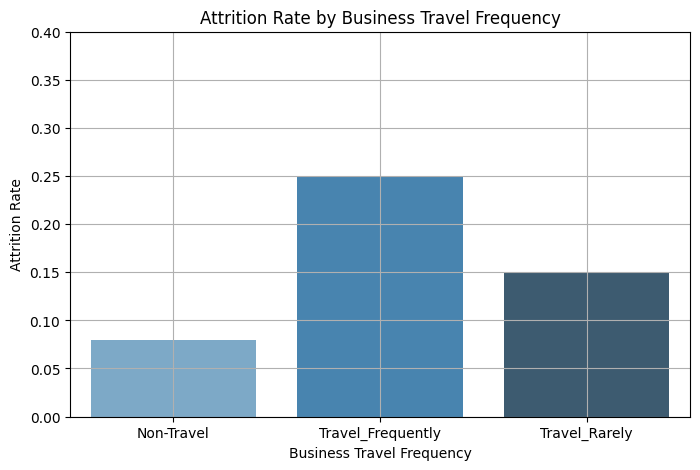

In [ ]:
#Correlation between Busniess Travel and Attrition Rate

data['AttritionBinary'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
business_travel_attrition = data.groupby('BusinessTravel')['AttritionBinary'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='BusinessTravel', y='AttritionBinary', data=business_travel_attrition, palette="Blues_d")
plt.title('Attrition Rate by Business Travel Frequency')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate')
plt.ylim(0, .4)
plt.grid(True)
plt.show()

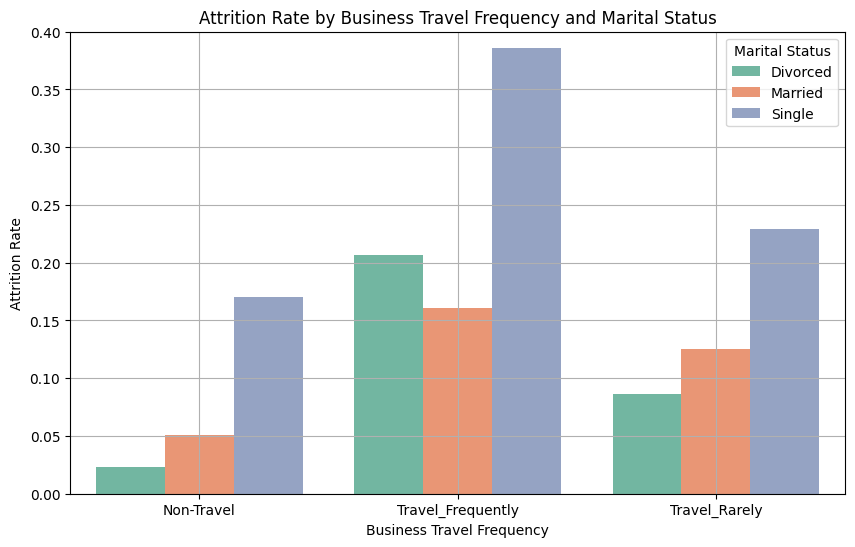

In [ ]:
#Marrital Status vs Busniess Travel = Attration

data['AttritionBinary'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
marital_travel_attrition = data.groupby(['MaritalStatus', 'BusinessTravel'])['AttritionBinary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='BusinessTravel', y='AttritionBinary', hue='MaritalStatus', data=marital_travel_attrition, palette="Set2")
plt.title('Attrition Rate by Business Travel Frequency and Marital Status')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate')
plt.ylim(0, .4)
plt.legend(title='Marital Status')
plt.grid(True)
plt.show()

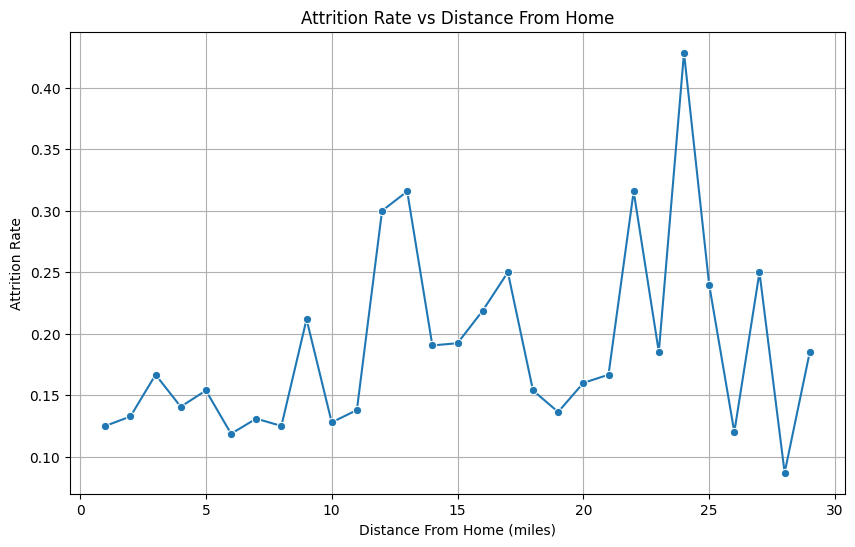

In [ ]:
#Correlation between distance from home and leaving

data['AttritionBinary'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
distance_attrition = data.groupby('DistanceFromHome')['AttritionBinary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='DistanceFromHome', y='AttritionBinary', data=distance_attrition, marker='o')
plt.title('Attrition Rate vs Distance From Home')
plt.xlabel('Distance From Home (miles)')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

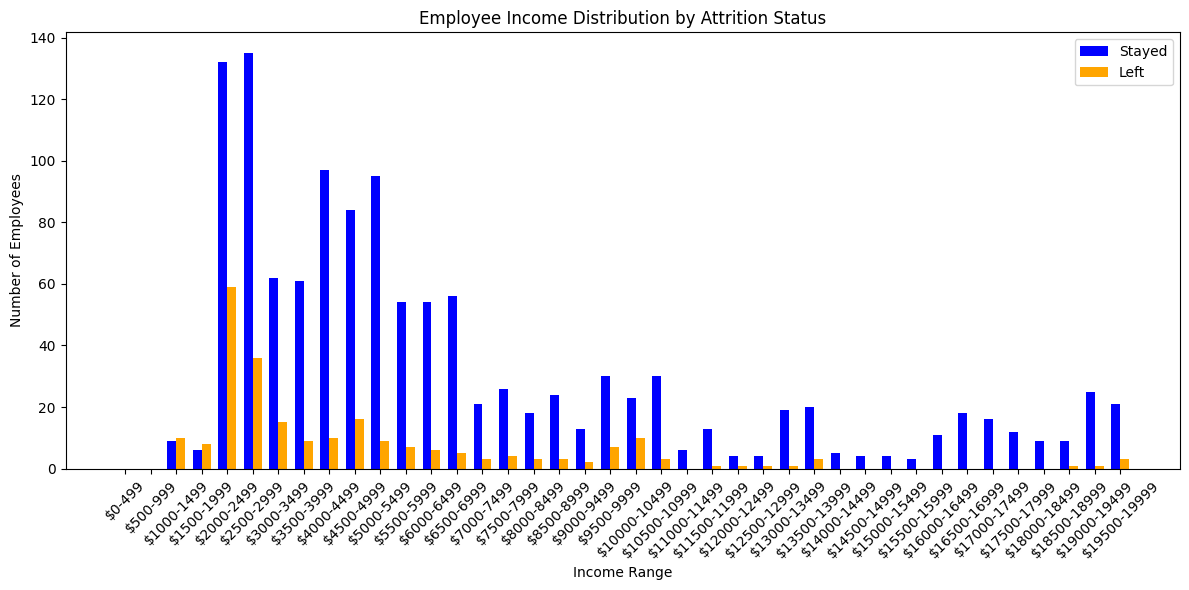

In [ ]:
#Monthly Income vs Attrition

bins = range(0, int(data['MonthlyIncome'].max()) + 500, 500)
labels = [f'${i}-{i+499}' for i in bins[:-1]]
data['IncomeRange'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels, right=False)
left = data[data['Attrition'] == 'Yes']
stayed = data[data['Attrition'] == 'No']
left_counts = left['IncomeRange'].value_counts().sort_index()
stayed_counts = stayed['IncomeRange'].value_counts().sort_index()
bar_width = 0.35
index = np.arange(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(index, stayed_counts, bar_width, label='Stayed', color='blue')
plt.bar(index + bar_width, left_counts, bar_width, label='Left', color='orange')
plt.title('Employee Income Distribution by Attrition Status')
plt.xlabel('Income Range')
plt.ylabel('Number of Employees')
plt.xticks(index + bar_width / 2, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#T-Test to see Monthly Income vs Attrition

data = {
    'MonthlyIncome': [1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'Attrition': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)
income_attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income_attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']
t_stat, p_value = stats.ttest_ind(income_attrition_yes, income_attrition_no)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in monthly income between employees who left and those who stayed.")
else:
    print("There is no significant difference in monthly income between employees who left and those who stayed.")

T-statistic: -0.5477225575051661
P-value: 0.6036450565101363
There is no significant difference in monthly income between employees who left and those who stayed.


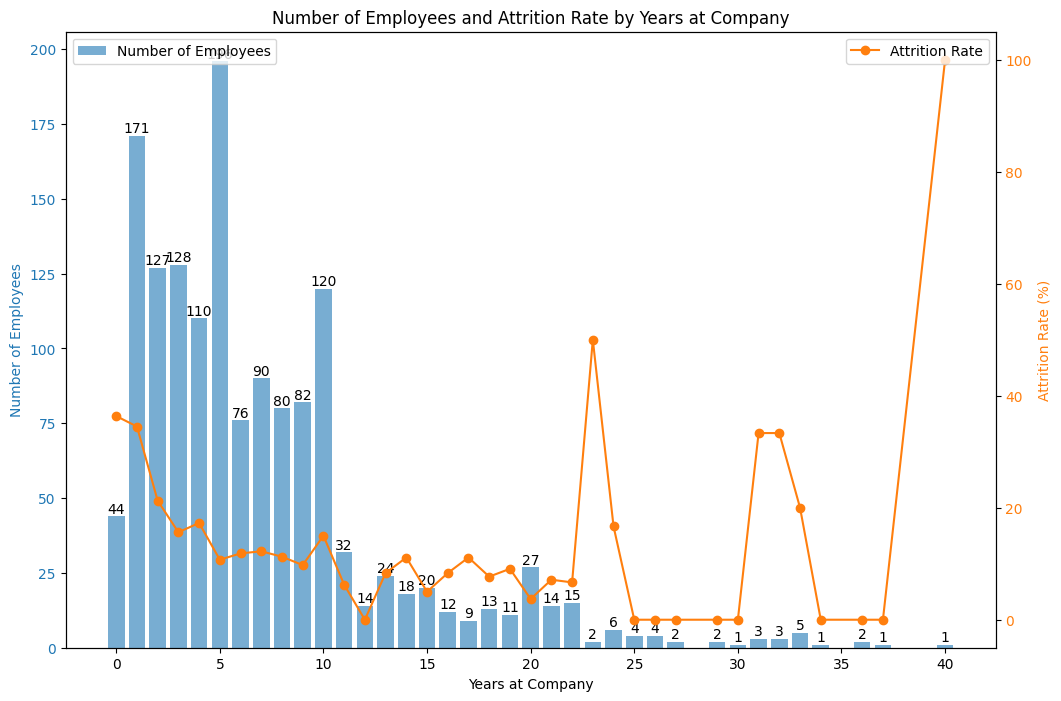

In [ ]:
#Loyality

employee_counts = data.groupby('YearsAtCompany').size()
attrition_rates = data.groupby('YearsAtCompany')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.set_xlabel('Years at Company')
ax1.set_ylabel('Number of Employees', color=color)
bars = ax1.bar(employee_counts.index, employee_counts.values, color=color, alpha=0.6, label='Number of Employees')
ax1.tick_params(axis='y', labelcolor=color)
ax1.bar_label(bars, labels=employee_counts.values, label_type='edge')
ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Attrition Rate (%)', color=color)
ax2.plot(attrition_rates.index, attrition_rates.values, color=color, marker='o', label='Attrition Rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Number of Employees and Attrition Rate by Years at Company')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

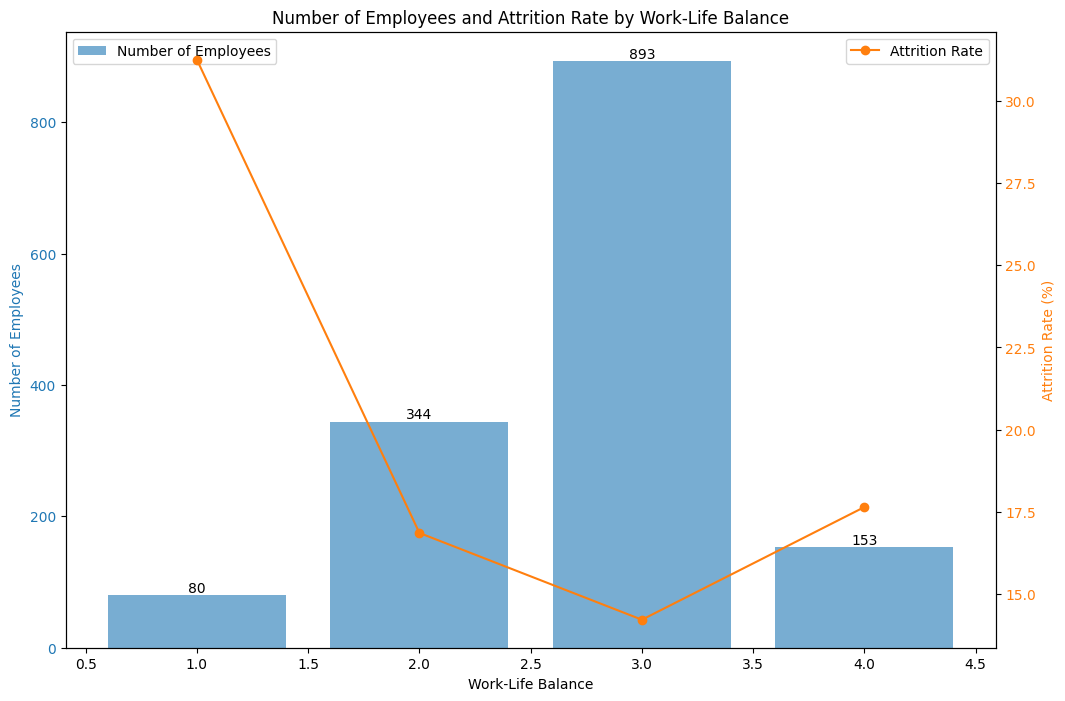

In [ ]:
#Work Life Balance

employee_counts = data.groupby('WorkLifeBalance').size()
attrition_rates = data.groupby('WorkLifeBalance')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.set_xlabel('Work-Life Balance')
ax1.set_ylabel('Number of Employees', color=color)
bars = ax1.bar(employee_counts.index, employee_counts.values, color=color, alpha=0.6, label='Number of Employees')
ax1.tick_params(axis='y', labelcolor=color)
ax1.bar_label(bars, labels=employee_counts.values, label_type='edge')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Attrition Rate (%)', color=color)
ax2.plot(attrition_rates.index, attrition_rates.values, color=color, marker='o', label='Attrition Rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Number of Employees and Attrition Rate by Work-Life Balance')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

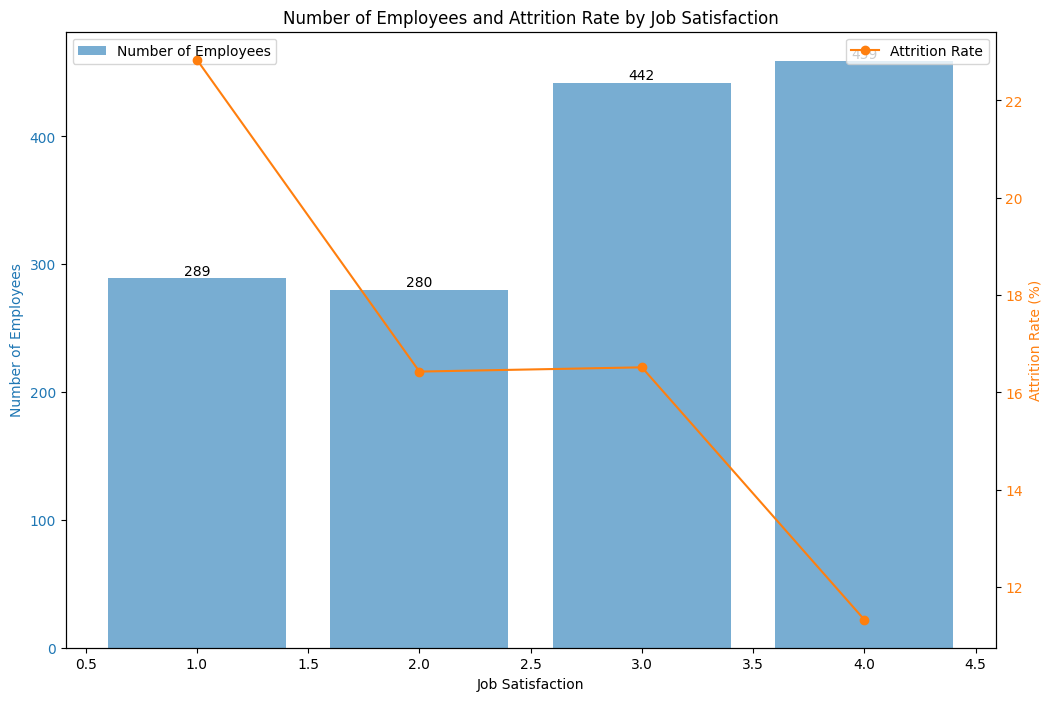

In [ ]:
#Job Satisfaction

employee_counts = data.groupby('JobSatisfaction').size()
attrition_rates = data.groupby('JobSatisfaction')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Job Satisfaction')
ax1.set_ylabel('Number of Employees', color=color)
bars = ax1.bar(employee_counts.index, employee_counts.values, color=color, alpha=0.6, label='Number of Employees')
ax1.tick_params(axis='y', labelcolor=color)
ax1.bar_label(bars, labels=employee_counts.values, label_type='edge')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Attrition Rate (%)', color=color)
ax2.plot(attrition_rates.index, attrition_rates.values, color=color, marker='o', label='Attrition Rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Number of Employees and Attrition Rate by Job Satisfaction')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

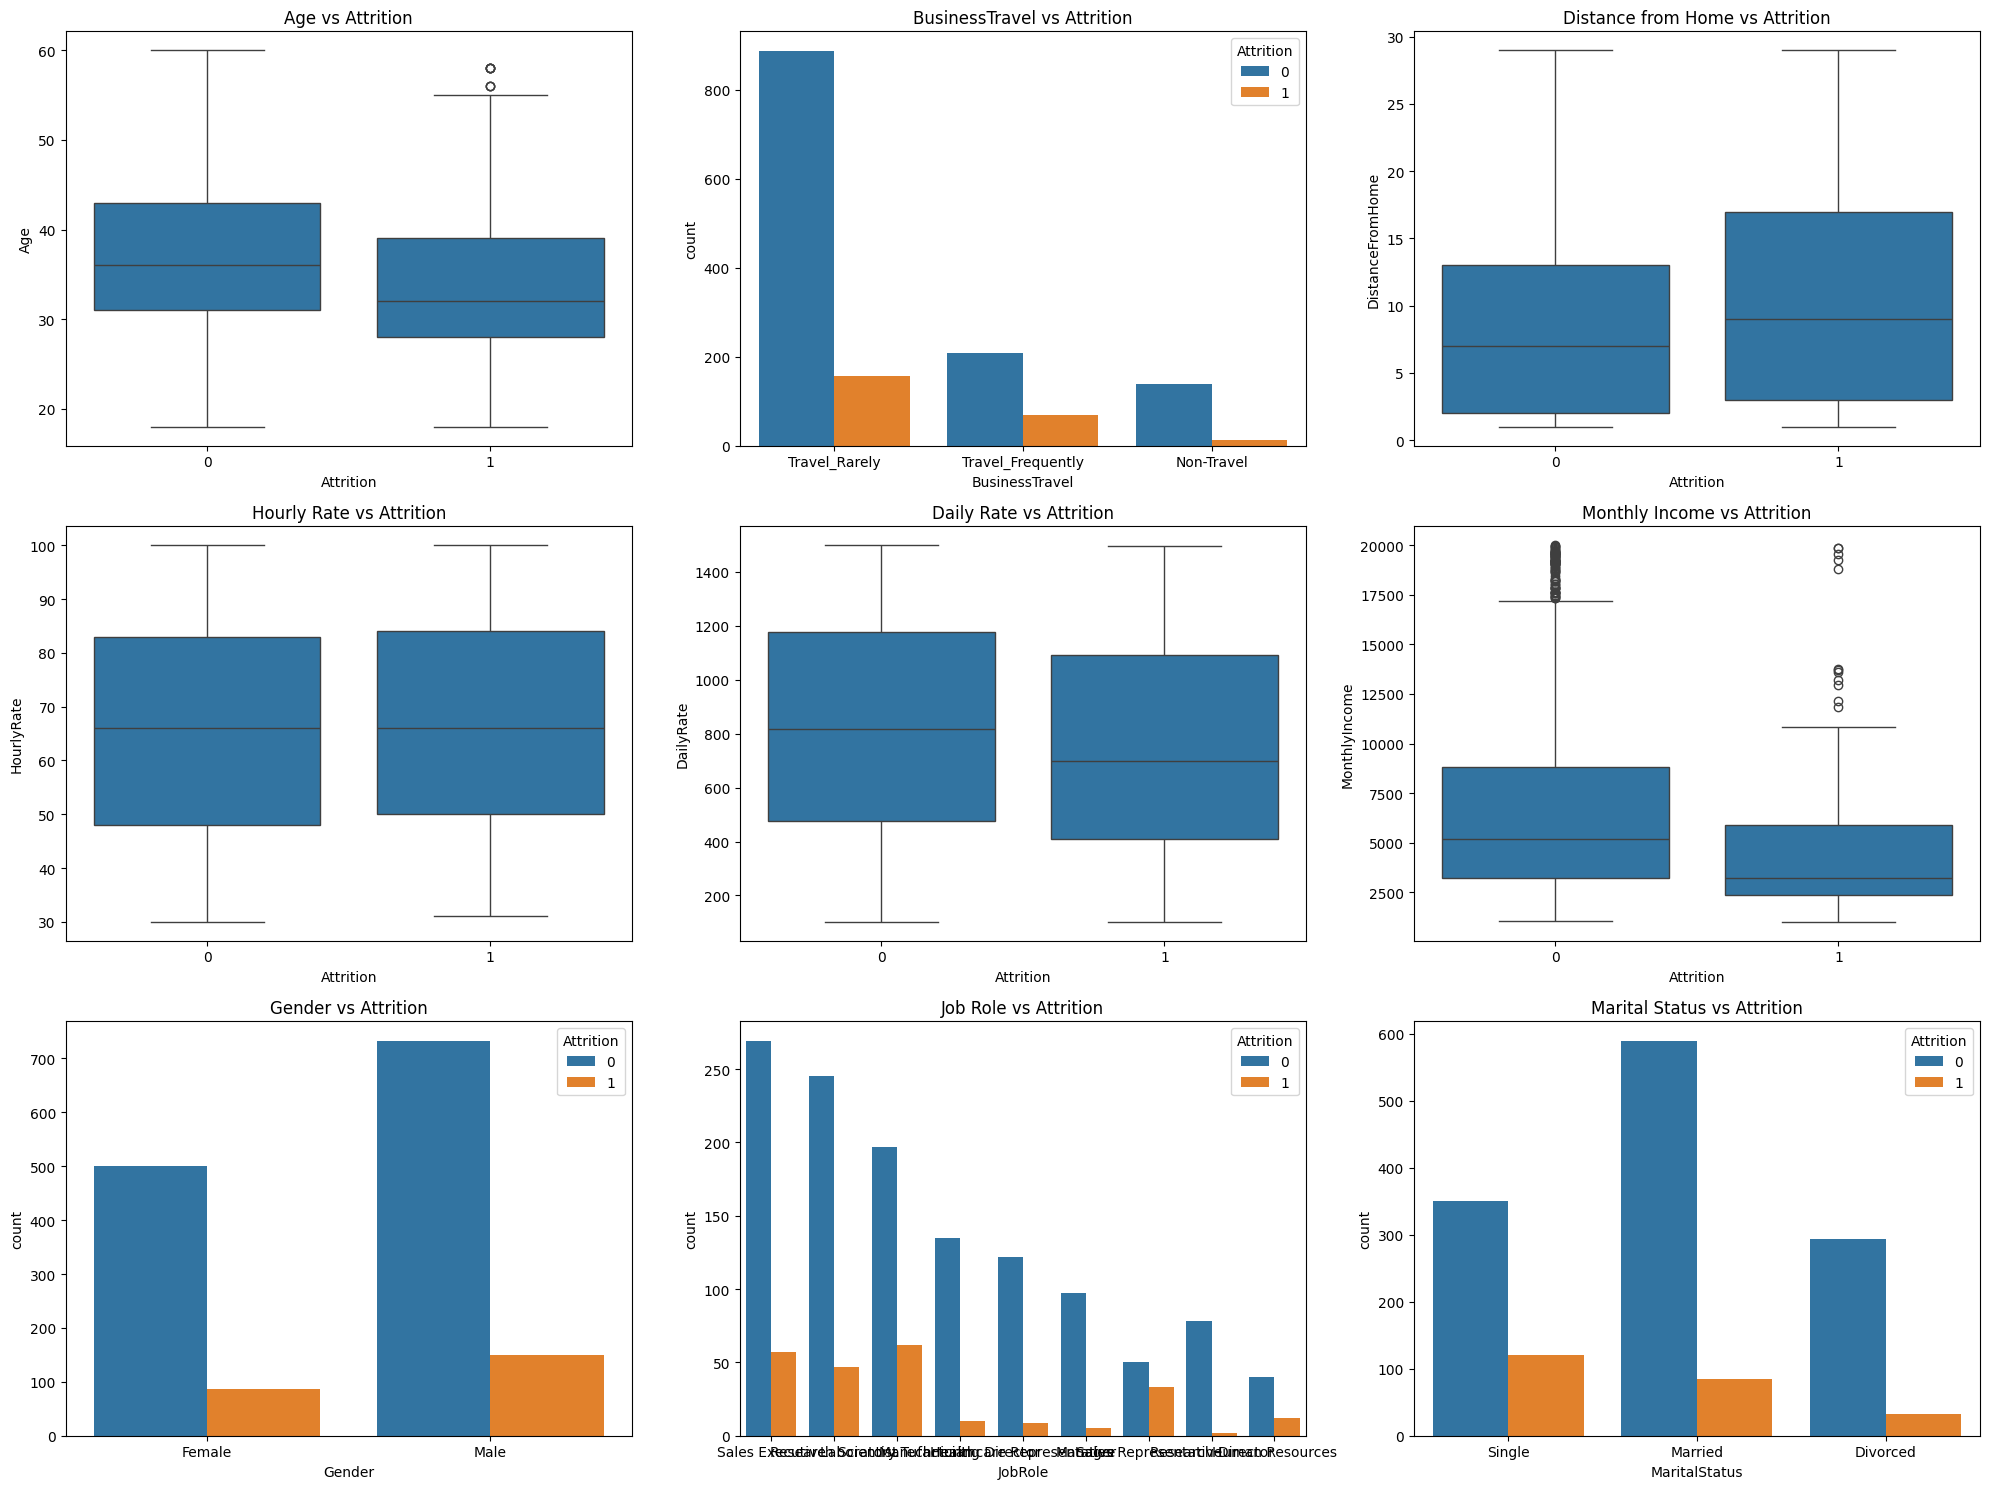

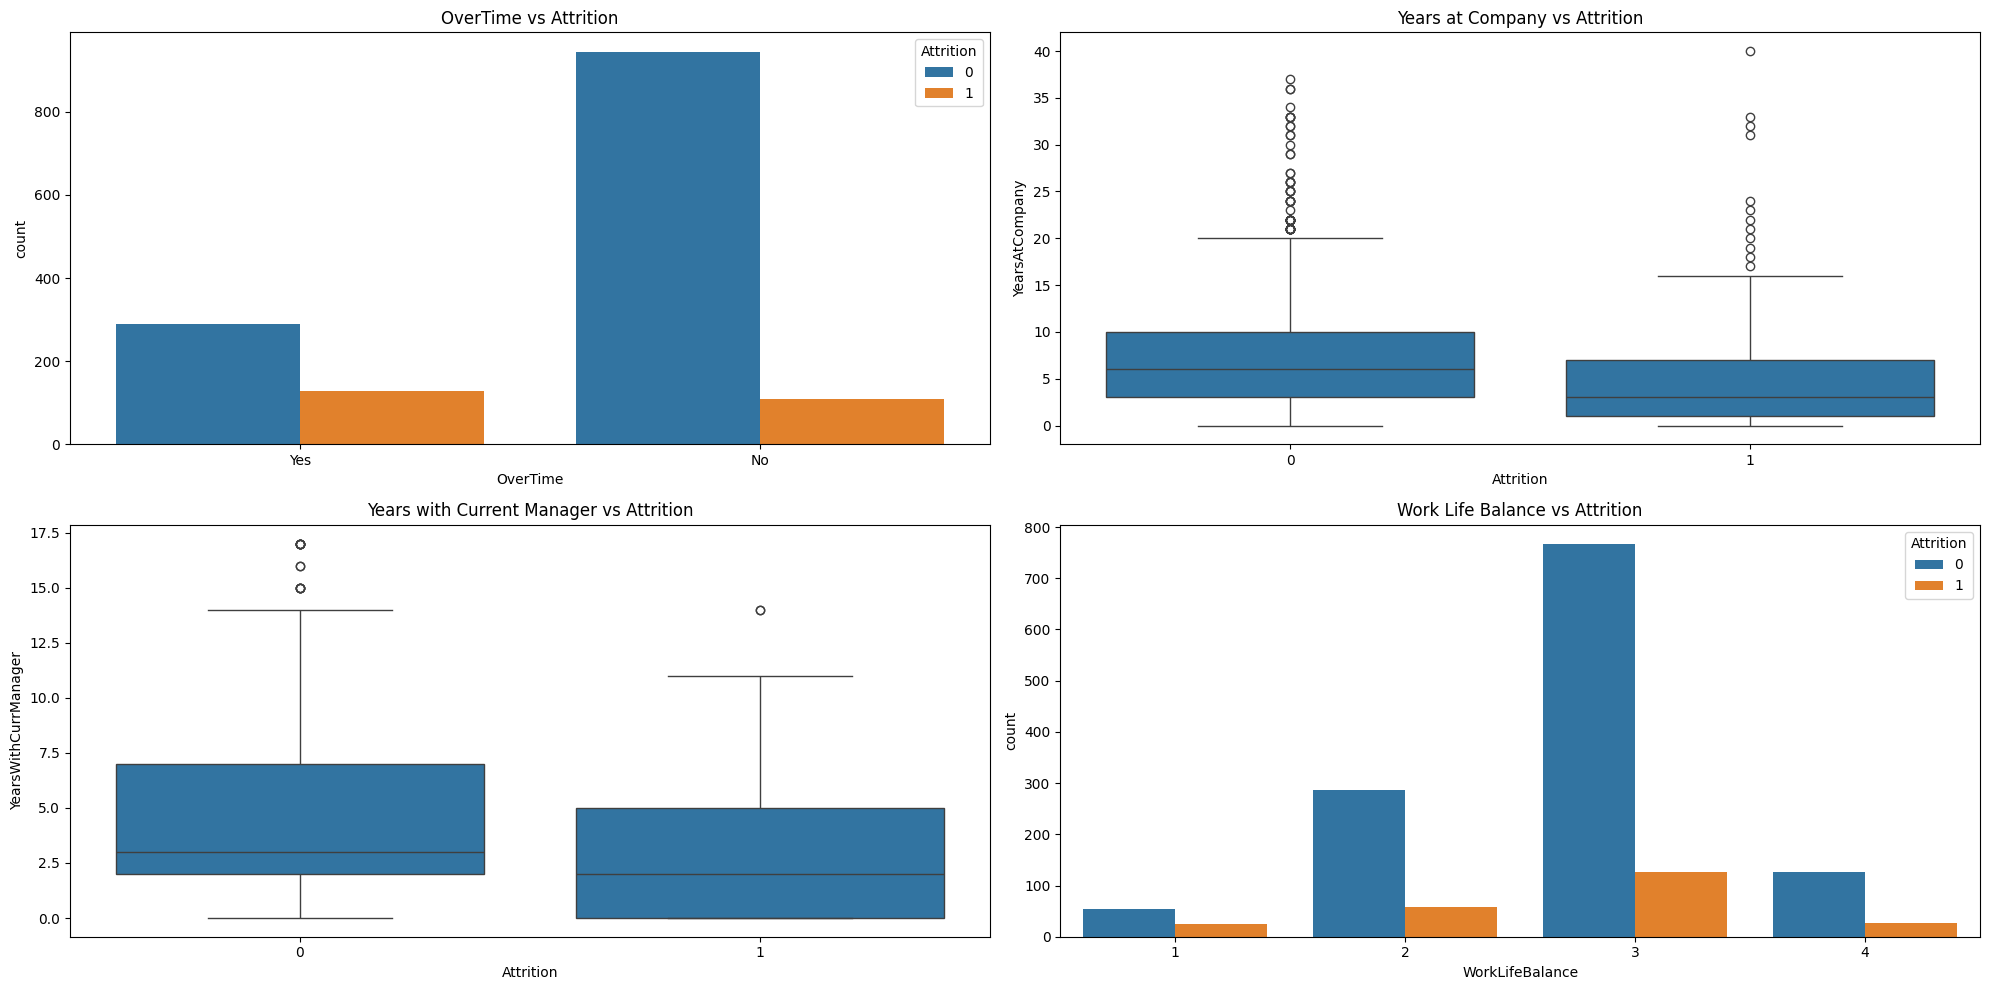

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('HR_Employee_Attrition_Dataset.csv')

columns_of_interest = [
    'Age', 'BusinessTravel', 'DistanceFromHome', 'HourlyRate',
    'DailyRate', 'MonthlyIncome', 'Gender', 'JobRole',
    'MaritalStatus', 'OverTime', 'YearsAtCompany',
    'YearsWithCurrManager', 'WorkLifeBalance', 'Attrition'
]

df = df[columns_of_interest]

# Convert Attrition to a binary variable for better comparison
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot relationships with Attrition
plt.figure(figsize=(20, 15))

# Age vs Attrition
plt.subplot(3, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')

# BusinessTravel vs Attrition
plt.subplot(3, 3, 2)
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('BusinessTravel vs Attrition')

# Distance from Home vs Attrition
plt.subplot(3, 3, 3)
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Distance from Home vs Attrition')

# Hourly Rate vs Attrition
plt.subplot(3, 3, 4)
sns.boxplot(x='Attrition', y='HourlyRate', data=df)
plt.title('Hourly Rate vs Attrition')

# Daily Rate vs Attrition
plt.subplot(3, 3, 5)
sns.boxplot(x='Attrition', y='DailyRate', data=df)
plt.title('Daily Rate vs Attrition')

# Monthly Income vs Attrition
plt.subplot(3, 3, 6)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')

# Gender vs Attrition
plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Gender vs Attrition')

# Job Role vs Attrition
plt.subplot(3, 3, 8)
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Job Role vs Attrition')

# Marital Status vs Attrition
plt.subplot(3, 3, 9)
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Marital Status vs Attrition')

plt.tight_layout()
plt.show()

# Additional plots for OverTime, YearsAtCompany, YearsWithCurrManager, and WorkLifeBalance
plt.figure(figsize=(20, 10))

# OverTime vs Attrition
plt.subplot(2, 2, 1)
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')

# Years At Company vs Attrition
plt.subplot(2, 2, 2)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Attrition')

# Years With Current Manager vs Attrition
plt.subplot(2, 2, 3)
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df)
plt.title('Years with Current Manager vs Attrition')

# Work Life Balance vs Attrition
plt.subplot(2, 2, 4)
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Work Life Balance vs Attrition')

plt.tight_layout()
plt.show()